# Computer Vision PS (WS21/22)

## Exercise sheet B (ExB)

**Group members**: *please list all group members here*

**Total (possible) points**: 10

---

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [3]:
# Load training/testing data with labels
X_trn = np.load('X_trn.npy')
y_trn = np.load('y_trn.npy')
X_tst = np.load('X_tst.npy')
y_tst = np.load('y_tst.npy')

In this example, our labels are `+1` and `-1` (in the lecture for the perceptron, we has `0` and `1`).

In [4]:
print(np.unique(y_trn))
print(np.unique(y_tst))

[-1  1]
[-1  1]


Plot the data ...

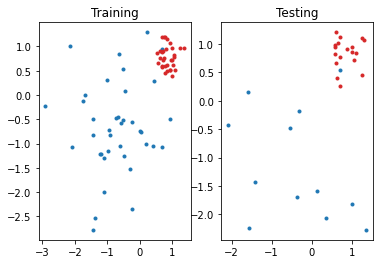

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(X_trn[y_trn==-1,0], X_trn[y_trn==-1,1],'.', color='tab:blue')
ax1.plot(X_trn[y_trn==+1,0], X_trn[y_trn==+1,1],'.', color='tab:red')
ax1.set_title('Training');

ax2.plot(X_tst[y_tst==-1,0], X_tst[y_tst==-1,1],'.', color='tab:blue')
ax2.plot(X_tst[y_tst==+1,0], X_tst[y_tst==+1,1],'.', color='tab:red')
ax2.set_title('Testing');

## ExB.1 (7 points)

Below is pseudocode for the standard perceptron algorithm, formulated slighly different from the lecture,  for labels in $\{+1,-1\}$.

```
w = [0,0]
b = 0
repeat N times
    for (x_i,y_i) in training set
        score = <w,x_i> + b
        if y_i * score <= 0
            w = w + y_i * x_i
            b = b + y_i
return w
```

Here `w = [0,0]` denotes $\mathbf{w} = (0,0)^\top$, `b=0` is the **bias** term $b$ (which we subsumbed in the lecture into $\mathbf{w}$). Also, `<w,x_i>` denotes the inner product between $\mathbf{w}$ and $\mathbf{x}_i$, i.e., $\langle \mathbf{w},\mathbf{x}_i\rangle$.

The *problem* with this classic variant of the perceptron is that we return the *last* weight vector, i.e., the most recent version. In fact, one could think of each update step as producing a new weight vector (and bias), i.e., a new classifier if you will. At each update, the classifier represents a version specifically tuned to the *last seen sample where an error was made*. The key idea of the **averaged perceptron** is not to return the most recent weight and bias, but to average them across all update steps. Empirically, this typically performs better.

A naive incarnation of this **averaged perceptron** algorithm can be written as:

```
w^{(0)} = [0,0]
b^{(0)} = 0
t = 0
repeat N times
    for (x_i,y_i) in training set
        score = <w^{(t)},x_i> + b
        if y_i * score <= 0
            w^{(t+1)} = w^{(t)} + y_i * x_i
            b^{(t+1)} = b^{(t)} + y_i
        else
            w^{(t+1)} = w^{(t+1)}
            b^{(t+1)} = b^{(t+1)}
        t = t + 1
    
    return average(w^{(1)},w^{(2)},...,w^{(k)}), average(b^{(1)},b^{(2)},...,b^{(k)})
```

Here, `w^{(t)}` denotes the weight vector at update step $t$, i.e., $\mathbf{w}^{(t)}$. Given a training set of size $T$ (i.e., $T$ training tuple of the form $(\mathbf{x}_i,y_i)$, and $N>0$ iterations, we eventually compute and return the average over $k=N\cdot T$ weight vectors and bias scalars. Specifically, we have, as our result, 

$$ \mathbf{w} = \frac{1}{N\cdot T} \sum_k \mathbf{w}^{(k)}, \quad \text{and} \quad 
\frac{1}{N\cdot T} \sum_k b^{(k)}\enspace.$$

Your task is to implement *both* the (1) **original perceptron** and the (2) **averaged perceptron** in a few lines of Python code. *Do not implement your solution as a class as we did in the lecture, unless you really want to*. Finally, assess the training/testing accuracy of both approaches.

In terms of points, there are 3 points for the original perceptron and 4 points for the averaged variant.

**Note**: stripped down to the bare minimum, this requires not more than 10-15 lines of code. When experimenting, set $N=1000$ for instance.

### Part I: Classic perceptron

In the perceptron implementation use $\langle \mathbf{w},\mathbf{x}\rangle + b$, i.e., the variant with explicit bias $b$ (as in the pseudocode). The decision rule then is

$$
\hat{y} = \text{sign}(\langle \mathbf{w},\mathbf{x}\rangle + b)
$$
as we have labels in $\{-1,+1\}$.

In [6]:
w = np.zeros((2,)).astype(np.float32) # Initial weight 
b = 0                                 # Initial bias
#
# YOUR CODE GOES HERE
#

### Part II: Averaged perceptron

In [7]:
w = np.zeros((2,)).astype(np.float32) # Initial weight 
b = 0                                 # Initial bias
#
# YOUR CODE GOES HERE
#

### Part III: Evaluation on training/testing data

In [8]:
#
# YOUR CODE GOES HERE
#

## ExB.2 (3 points)

Modify the code of the **averaged perceptron** to make it more efficient, i.e., so that you do not have to store **all** weight vectors from **all** $N \cdot T$ updates.

**Hint**: Just think about how the update is actually computed, e.g., take $\mathbf{w}^{(4)}$:

0. $\mathbf{w}^{(0)} = (0,0)^\top$
1. $\mathbf{w}^{(1)} = \mathbf{w}^{(0)} + \boldsymbol{\theta}_1 = \boldsymbol{\theta}_1 $
2. $\mathbf{w}^{(2)} = \mathbf{w}^{(1)} + \boldsymbol{\theta}_2 = \boldsymbol{\theta}_1 + \boldsymbol{\theta}_2$
3. $\mathbf{w}^{(3)} = \mathbf{w}^{(2)} + \boldsymbol{\theta}_3 = \boldsymbol{\theta}_1 + \boldsymbol{\theta}_2 + \boldsymbol{\theta}_3$
4. $\mathbf{w}^{(4)} = \mathbf{w}^{(2)} + \boldsymbol{\theta}_4 = \boldsymbol{\theta}_1 + \boldsymbol{\theta}_2 + \boldsymbol{\theta}_3 + \boldsymbol{\theta}_4$

So, 

$$ \frac{\mathbf{w}^{(1)}+\mathbf{w}^{(2)}+\mathbf{w}^{(3)}+\mathbf{w}^{(4)}}{4}$$
can be written as
$$ \frac{4}{4}\boldsymbol{\theta}_1 + \frac{3}{4}\boldsymbol{\theta}_2 + \frac{2}{4}\boldsymbol{\theta}_3 + \frac{1}{4}\boldsymbol{\theta}_4$$

Essentially, you just need to translate this into code.

In [8]:
w = np.zeros((2,)).astype(np.float32)
b = 0
#
# YOUR CODE GOES HERE
#